In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("training_set.csv")

In [5]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
txid,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
issuer_country,DE,PL,AE,GB,DE,ES,DE,ES,AE,PT,...,ES,PT,US,NO,US,ES,GB,ES,US,IT
txvariantcode,VISABUSINESS,MCCREDIT,MCCREDIT,VISA,VISABUSINESS,MCCREDIT,MCCREDIT,MCCREDIT,MCCREDIT,VISABUSINESS,...,MCCREDIT,VISABUSINESS,MCCREDIT,VISACLASSIC,VISA,VISA,VISA,MCCREDIT,MCCREDIT,VISA
bin,794962,506222,458187,190652,838325,172695,941570,906281,458187,462923,...,172695,462923,263817,291605,230935,688618,202695,175968,263817,573061
amount,20876,453,3887,1868,1231,3085,993,1442,4126,1763,...,1779,2385,2858,93,3023,3182,4868,1197,3827,12605
currency,EUR,PLN,AED,GBP,EUR,EUR,EUR,EUR,AED,EUR,...,EUR,EUR,USD,NOK,USD,EUR,GBP,EUR,USD,EUR
shopper_country,UA,PL,AE,GB,DE,ES,DE,UA,AE,PT,...,ES,PT,US,NO,RO,ES,UA,ES,US,NI
creation_date,2014-03-02 15:21:33,2014-03-03 22:28:48,2014-02-14 21:13:39,2014-03-02 12:56:07,2014-02-28 13:46:57,2014-02-15 17:02:54,2014-03-10 04:12:46,2014-02-21 19:23:28,2014-02-11 11:21:55,2014-02-11 03:16:14,...,2014-02-14 06:43:08,2014-02-21 23:43:24,2014-03-08 17:56:27,2014-02-20 06:15:01,2014-02-26 23:36:16,2014-02-17 12:22:26,2014-03-09 14:40:59,2014-03-01 00:19:22,2014-02-14 00:56:03,2014-02-20 06:24:19
shopper_email,michallevy@comcast.net,ossie_goble@gmx.de,carola.giron@outlook.com,rhea-mayers@rediffmail.com,sacha_baylor@yandex.com,sharla.epps@gmx.de,charleen.magana@rediffmail.com,wyatt.cohen@comcast.net,carola.giron@bellsouth.net,jodyness@bellsouth.net,...,sharla.epps@gmx.de,jodyness@bellsouth.net,tonda_fusco@shaw.ca,arlen_stinson@barcelona.com,loreta.booth@barcelona.com,carolin_whittle@barcelona.com,michallevy@comcast.net,macy.dingle@qq.com,tonda_fusco@shaw.ca,joshua_horn@gmx.de
card_number_hash,card853505,card269538,card840790,card252673,card864506,card185485,card990770,card119845,card840790,card679729,...,card185485,card679729,card572488,card95523,card573290,card573526,card813317,card817072,card572488,card116991


In [82]:
country=pd.get_dummies(data['shopper_country'])

In [83]:
issuer_country=pd.get_dummies(data['issuer_country'])

In [90]:
country['fraud']=data['fraud']
country['amount'] = data['amount']

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
y=[]
for x in country['fraud']:
    if x== True:
        y.append(1)
    else:
        y.append(0)

In [100]:
country.values[:, :-3]

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [95]:
country['y']=y

In [111]:
clf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
clf.fit(country.values[:, :-3],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [124]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(country.values[:, :-3], y)

In [123]:
LG.

([<matplotlib.axis.YTick at 0x7f817598c198>,
 <a list of 16 Text yticklabel objects>)

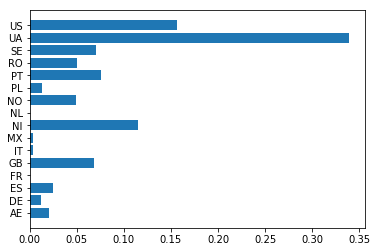

In [117]:
plt.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(range(len(country.columns[:-3])), [i for i in country.columns[:-3]])

In [28]:
data.groupby(by="card_number_hash").count()

,txid,issuer_country,txvariantcode,bin,amount,currency,shopper_country,creation_date,shopper_email,fraud
card_number_hash,,,,,,,,,,
card104615,3,3,3,3,3,3,3,3,3,3
card107695,2,2,2,2,2,2,2,2,2,2
card111186,1,1,1,1,1,1,1,1,1,1
card116991,3,3,3,3,3,3,3,3,3,3
card119845,1,1,1,1,1,1,1,1,1,1
card14939,2,2,2,2,2,2,2,2,2,2
card185102,3,3,3,3,3,3,3,3,3,3
card185485,3,3,3,3,3,3,3,3,3,3
card227894,1,1,1,1,1,1,1,1,1,1


In [13]:
data.groupby(by=['issuer_country','fraud']).sum()

txid      bin  amount
issuer_country fraud                       
AE             False   218  2749122   20008
               True    128  1578498    2073
DE             False   254  4505263    9413
               True      0   794962   20876
ES             False   565  6526973   22897
               True    200  1285564    3631
FR             True     56   347045    1447
GB             False   448  4098871   20227
               True     96   202695    4868
IT             False    50   141909    4271
               True    218  2292244   64409
MX             False    97   987048   61728
NL             False    86  2455305    5928
NO             False   387  5732762   68189
PL             False   361  4790632   16356
PT             False   631  8724881   24902
               True     80   879486    1952
RO             False    36   848392   15485
SE             False   540  3852063  225407
US             False   190   527634    6685
               True    309  3849450   23264

In [35]:
data.groupby(by=['fraud'])['amount'].mean()

fraud
False    6268.7
True     6126.0
Name: amount, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f81785c2668>,
 'caps': [<matplotlib.lines.Line2D at 0x7f81785c2cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f81785c2518>],
 'medians': [<matplotlib.lines.Line2D at 0x7f81785ca3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f81785ca710>],
 'means': []}

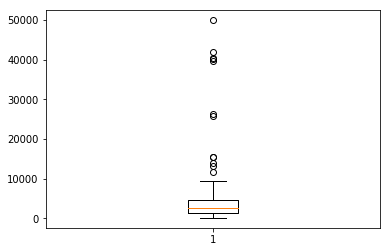

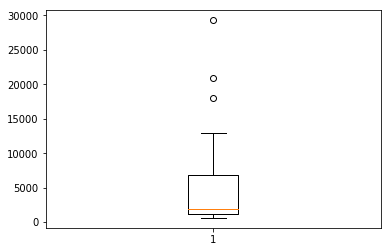

In [76]:
plt.boxplot(x)
plt.figure()
plt.boxplot(y)

In [69]:
from scipy import stats

In [58]:
amount_False=[]
amount_True=[]
for i,v in enumerate(list(data['fraud'])):
    if i == False:
        amount_False.append(data['amount'][i])
    else:
        amount_True.append(data['amount'][i])

In [106]:
print(data[data['fraud']== False]['amount'].quantile([0.25,0.5,0.75]))

print(data[data['fraud']== True]['amount'].quantile([0.25,0.5,0.75]))

0.25    1206.0
0.50    2642.0
0.75    4670.0
Name: amount, dtype: float64
0.25    1189.50
0.50    1946.00
0.75    6802.25
Name: amount, dtype: float64


In [107]:
data[data['fraud']== False]['amount'].max()

49972

In [71]:
stats.ttest_ind(x, y)

Ttest_indResult(statistic=0.05596023740232247, pvalue=0.9554874162926676)

In [39]:
data['issuer_country']

'DE'

In [37]:
count = 0
for i in range(data.shape[0]):
    if data['issuer_country'][0] = data['issuer_country'] [0]

(100, 12)

In [20]:
import datetime

In [25]:
email=[]
for item in data['shopper_email']:
    x=item.split('@')
    email.append(x[1])

In [29]:
data['email']=email

In [33]:
data.groupby(by=['fraud','email']).sum()

txid      bin  amount
fraud email                                
False airforce.net     377  3862969   90254
      aol.com           61  1636870    4797
      barcelona.com    439  4606791   15647
      bellsouth.net    303  3736109   40653
      charter.net      175  1521084    9453
      comcast.net      178  2591260    4611
      earthlink.net     65   803331    2591
      gmail.com         88  1379916    4336
      gmx.de           217  2470553   13747
      live.com         140  1388941    4046
      live.nl           78   926507    4715
      outlook.com       92  1374561    8474
      protonmail.com    30   547468   14000
      qq.com           142   455067   52916
      rediffmail.com   451  4768921   75599
      sbcglobal.net    170  1264975   68976
      shaw.ca          375  3368811   13652
      sky.com          200  3472569    5901
      verizon.net      109  2599980   61129
      wanadoo.fr        25   818435    1131
      yandex.com       148  2345737    4868
True  airforce.net      40   175968    1197
      aol.com          228  2683203    4155
      barcelona.com     94   230935    3023
      charter.net       80   879486    1952
      comcast.net      311  4616172   45985
      gmx.de           168  1146122   41895
      msn.com           19   175968     602
      orange.fr         18   573061    4580
      qq.com            97   175968    1197
      rediffmail.com    32   573061   17934

In [34]:
import matplotlib.pyplot as plt